In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/r-street-quant-challenge/sample_submission.csv
/kaggle/input/r-street-quant-challenge/train_target.csv
/kaggle/input/r-street-quant-challenge/train_data.csv
/kaggle/input/r-street-quant-challenge/test_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [3]:
data_df = pd.read_csv('/kaggle/input/r-street-quant-challenge/train_data.csv')
data_target = pd.read_csv('/kaggle/input/r-street-quant-challenge/train_target.csv')
data_test = pd.read_csv('/kaggle/input/r-street-quant-challenge/test_data.csv')
sample_sub = pd.read_csv('/kaggle/input/r-street-quant-challenge/sample_submission.csv')

In [4]:
data_df.head(20)


,Id,date,open,high,low,close,day,week,SMA_7,SMA_14,SMA_21,RSI_7,RSI_14,RSI_21,ATR_14,bb_mavg,bb_hband,bb_lband
0,0,2015-01-12 09:15:00+05:30,0.252483,0.249671,0.255665,0.250255,12,3,0.249131,0.246873,0.247927,54.402627,48.236033,45.263488,0.007017,0.247667,0.256181,0.239153
1,1,2015-01-12 09:30:00+05:30,0.247851,0.246028,0.257602,0.251258,12,3,0.250327,0.247607,0.247838,57.307707,49.928940,46.453986,0.007040,0.247534,0.255730,0.239338
2,2,2015-01-12 09:45:00+05:30,0.248817,0.248992,0.259178,0.253956,12,3,0.251520,0.248550,0.247840,64.423555,54.263566,49.554022,0.007103,0.247566,0.255858,0.239275
3,3,2015-01-12 10:00:00+05:30,0.251481,0.249916,0.260682,0.253628,12,3,0.252341,0.248788,0.247855,62.935127,53.655190,49.190342,0.007076,0.247743,0.256385,0.239101
4,4,2015-01-12 10:15:00+05:30,0.251066,0.250750,0.262421,0.255314,12,3,0.253037,0.249406,0.248103,67.444567,56.362731,51.125779,0.007199,0.248086,0.257337,0.238835
5,5,2015-01-12 10:30:00+05:30,0.252736,0.250170,0.262006,0.253919,12,3,0.253037,0.249973,0.248364,60.359087,53.575063,49.488780,0.007163,0.248329,0.257918,0.238739
6,6,2015-01-12 10:45:00+05:30,0.251481,0.249545,0.261331,0.253673,12,3,0.253143,0.250497,0.248583,59.081205,53.076172,49.196897,0.007180,0.248898,0.258335,0.239462
7,7,2015-01-12 11:00:00+05:30,0.251219,0.249073,0.262006,0.253126,12,3,0.253554,0.251343,0.249100,56.007054,51.919147,48.529046,0.007263,0.249506,0.258372,0.240640
8,8,2015-01-12 11:15:00+05:30,0.250596,0.248747,0.261160,0.253965,12,3,0.253940,0.252134,0.249718,59.753246,53.589769,49.629927,0.007318,0.250166,0.258261,0.242072
9,9,2015-01-12 11:30:00+05:30,0.251517,0.249345,0.261718,0.253054,12,3,0.253811,0.252666,0.250304,53.929622,51.495316,48.447296,0.007349,0.250304,0.258496,0.242112


In [5]:
data_df['date'] = pd.to_datetime(data_df['date'])

In [6]:
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df['day'] = data_df['date'].dt.day
data_df['hour'] = data_df['date'].dt.hour
data_df['minute'] = data_df['date'].dt.minute

In [7]:
data_test['date'] = pd.to_datetime(data_test['date'])
data_test['year'] = data_test['date'].dt.year
data_test['month'] = data_test['date'].dt.month
data_test['day'] = data_test['date'].dt.day
data_test['hour'] = data_test['date'].dt.hour
data_test['minute'] = data_test['date'].dt.minute

In [8]:
data_df



,Id,date,open,high,low,close,day,week,SMA_7,SMA_14,...,RSI_14,RSI_21,ATR_14,bb_mavg,bb_hband,bb_lband,year,month,hour,minute
0,0,2015-01-12 09:15:00+05:30,0.252483,0.249671,0.255665,0.250255,12,3,0.249131,0.246873,...,48.236033,45.263488,0.007017,0.247667,0.256181,0.239153,2015,1,9,15
1,1,2015-01-12 09:30:00+05:30,0.247851,0.246028,0.257602,0.251258,12,3,0.250327,0.247607,...,49.928940,46.453986,0.007040,0.247534,0.255730,0.239338,2015,1,9,30
2,2,2015-01-12 09:45:00+05:30,0.248817,0.248992,0.259178,0.253956,12,3,0.251520,0.248550,...,54.263566,49.554022,0.007103,0.247566,0.255858,0.239275,2015,1,9,45
3,3,2015-01-12 10:00:00+05:30,0.251481,0.249916,0.260682,0.253628,12,3,0.252341,0.248788,...,53.655190,49.190342,0.007076,0.247743,0.256385,0.239101,2015,1,10,0
4,4,2015-01-12 10:15:00+05:30,0.251066,0.250750,0.262421,0.255314,12,3,0.253037,0.249406,...,56.362731,51.125779,0.007199,0.248086,0.257337,0.238835,2015,1,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,25495,2019-02-28 10:30:00+05:30,0.711045,0.711635,0.721231,0.718972,28,9,0.716356,0.715153,...,53.338774,51.661272,0.006446,0.713322,0.720650,0.705994,2019,2,10,30
25496,25496,2019-02-28 10:45:00+05:30,0.712138,0.712070,0.720268,0.717022,28,9,0.717192,0.715279,...,50.340798,49.789358,0.006478,0.713906,0.720413,0.707398,2019,2,10,45
25497,25497,2019-02-28 11:00:00+05:30,0.710287,0.710058,0.719988,0.716538,28,9,0.717063,0.715391,...,49.597282,49.324591,0.006513,0.714128,0.720676,0.707579,2019,2,11,0
25498,25498,2019-02-28 11:15:00+05:30,0.709853,0.709922,0.719988,0.717085,28,9,0.717277,0.715434,...,50.488807,49.880711,0.006520,0.714450,0.720914,0.707985,2019,2,11,15


In [9]:
data_target.head(20)

,Id,target
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


In [10]:
target = data_target['target']

In [11]:
target.value_counts()

1    13002
0    12498
Name: target, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

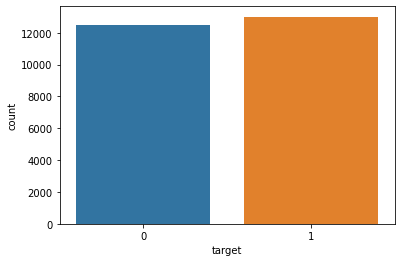

In [12]:
sns.countplot(target)

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype                                
---  ------    --------------  -----                                
 0   Id        25500 non-null  int64                                
 1   date      25500 non-null  datetime64[ns, pytz.FixedOffset(330)]
 2   open      25500 non-null  float64                              
 3   high      25500 non-null  float64                              
 4   low       25500 non-null  float64                              
 5   close     25500 non-null  float64                              
 6   day       25500 non-null  int64                                
 7   week      25500 non-null  int64                                
 8   SMA_7     25500 non-null  float64                              
 9   SMA_14    25500 non-null  float64                              
 10  SMA_21    25500 non-null  float64                         

In [14]:
data_df.describe()

,Id,open,high,low,close,day,week,SMA_7,SMA_14,SMA_21,...,RSI_14,RSI_21,ATR_14,bb_mavg,bb_hband,bb_lband,year,month,hour,minute
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,...,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,12749.500000,0.426294,0.425500,0.435774,0.430332,15.821451,25.895882,0.430277,0.430212,0.430148,...,51.527932,51.463198,0.007197,0.430157,0.438225,0.422090,2016.613216,6.333098,11.883490,22.201176
std,7361.360268,0.215698,0.216545,0.215109,0.217723,8.783503,15.262122,0.217691,0.217656,0.217621,...,14.399158,12.179462,0.001067,0.217626,0.217826,0.217572,1.198456,3.498856,1.846335,16.497617
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.005308,0.008305,0.010751,...,10.212109,15.661414,0.004837,0.010533,0.020252,-0.008329,2015.000000,1.000000,9.000000,0.000000
25%,6374.750000,0.241356,0.239658,0.251347,0.243633,8.000000,12.000000,0.243421,0.243261,0.243329,...,40.904673,42.318029,0.006370,0.243405,0.251937,0.235589,2016.000000,3.000000,10.000000,15.000000
50%,12749.500000,0.357613,0.356661,0.367412,0.360990,16.000000,26.000000,0.361008,0.360740,0.360134,...,51.908971,52.068601,0.006907,0.360120,0.368240,0.353344,2017.000000,6.000000,12.000000,15.000000
75%,19124.250000,0.637443,0.637602,0.646221,0.643665,23.000000,39.000000,0.643733,0.643456,0.643102,...,62.047714,60.205687,0.007918,0.643231,0.652010,0.633294,2018.000000,9.000000,13.000000,30.000000
max,25499.000000,0.877429,0.878482,0.886115,0.885323,31.000000,53.000000,0.884363,0.883673,0.883438,...,94.058907,88.579212,0.013992,0.883434,0.888044,0.881087,2019.000000,12.000000,19.000000,45.000000


In [15]:
print(data_df.columns)

Index(['Id', 'date', 'open', 'high', 'low', 'close', 'day', 'week', 'SMA_7',
       'SMA_14', 'SMA_21', 'RSI_7', 'RSI_14', 'RSI_21', 'ATR_14', 'bb_mavg',
       'bb_hband', 'bb_lband', 'year', 'month', 'hour', 'minute'],
      dtype='object')


In [16]:
data_df.mean()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Id          12749.500000
open            0.426294
high            0.425500
low             0.435774
close           0.430332
day            15.821451
week           25.895882
SMA_7           0.430277
SMA_14          0.430212
SMA_21          0.430148
RSI_7          51.593084
RSI_14         51.527932
RSI_21         51.463198
ATR_14          0.007197
bb_mavg         0.430157
bb_hband        0.438225
bb_lband        0.422090
year         2016.613216
month           6.333098
hour           11.883490
minute         22.201176
dtype: float64

In [17]:
data_df.max()

Id                              25499
date        2019-02-28 11:30:00+05:30
open                         0.877429
high                         0.878482
low                          0.886115
close                        0.885323
day                                31
week                               53
SMA_7                        0.884363
SMA_14                       0.883673
SMA_21                       0.883438
RSI_7                       98.364625
RSI_14                      94.058907
RSI_21                      88.579212
ATR_14                       0.013992
bb_mavg                      0.883434
bb_hband                     0.888044
bb_lband                     0.881087
year                             2019
month                              12
hour                               19
minute                             45
dtype: object

In [18]:
data_df.nunique()

Id          25500
date        25500
open        21119
high        21097
low         21109
close       21048
day            31
week           53
SMA_7       24778
SMA_14      25099
SMA_21      25251
RSI_7       25423
RSI_14      25423
RSI_21      25423
ATR_14      25407
bb_mavg     25235
bb_hband    25491
bb_lband    25491
year            5
month          12
hour           10
minute          4
dtype: int64

In [19]:
num_cols = list(set(data_df.columns)-{'Id','date','day', 'week','year','month','hour','minute'})
cat_cols = list(set(data_df.columns)-set(num_cols)-{'Id','date'})
print(cat_cols)

['minute', 'week', 'year', 'day', 'hour', 'month']


<AxesSubplot:>

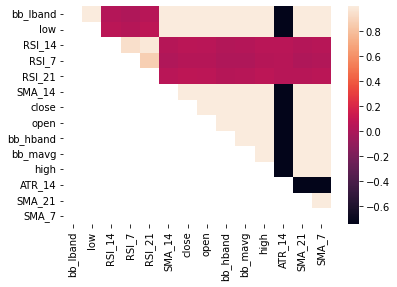

In [20]:
corr_matrix = data_df[num_cols].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
sns.heatmap(upper)


In [21]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]
to_drop

['low',
 'SMA_14',
 'close',
 'open',
 'bb_hband',
 'bb_mavg',
 'high',
 'SMA_21',
 'SMA_7']

In [22]:
X = data_df.drop(['Id','date'], axis=1)
features_test = data_test.drop(['Id','date'], axis=1)
y = target


In [23]:
features_test.head()

,open,high,low,close,day,week,SMA_7,SMA_14,SMA_21,RSI_7,RSI_14,RSI_21,ATR_14,bb_mavg,bb_hband,bb_lband,year,month,hour,minute
0,0.710449,0.709442,0.717385,0.713886,28,9,0.716937,0.715797,0.714850,39.141180,45.100563,46.593212,0.006644,0.715120,0.720489,0.709751,2019,2,11,45
1,0.707126,0.707448,0.716142,0.713120,28,9,0.716260,0.715950,0.715024,36.414816,43.896867,45.835237,0.006630,0.715349,0.719901,0.710797,2019,2,12,0
2,0.706305,0.707384,0.716512,0.713767,28,9,0.715516,0.715936,0.715274,40.501595,45.227509,46.606126,0.006566,0.715275,0.719879,0.710671,2019,2,12,15
3,0.707018,0.706269,0.715602,0.713767,28,9,0.715051,0.716122,0.715203,40.501595,45.227509,46.606126,0.006632,0.715215,0.719864,0.710565,2019,2,12,30
4,0.707009,0.706260,0.715422,0.711990,28,9,0.714402,0.715732,0.715061,32.655532,42.050687,44.680601,0.006695,0.714990,0.719803,0.710176,2019,2,12,45


In [24]:
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 42)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cat_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[cat_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(features_test[cat_cols]))
# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index
OH_cols_test.index = features_test.index
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(cat_cols, axis=1)
num_X_valid = X_valid.drop(cat_cols, axis=1)
num_X_test = features_test.drop(cat_cols, axis=1)
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [25]:
OH_X_train.head()

,open,high,low,close,SMA_7,SMA_14,SMA_21,RSI_7,RSI_14,RSI_21,...,105,106,107,108,109,110,111,112,113,114
14053,0.433820,0.433168,0.444580,0.438573,0.436448,0.435807,0.434488,78.210402,76.479489,74.267361,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11448,0.202973,0.201398,0.214215,0.205245,0.204493,0.203293,0.203000,62.565714,59.151492,56.090570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16720,0.526006,0.524277,0.532777,0.528357,0.533157,0.535433,0.537948,22.860120,32.960810,36.211853,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13822,0.421928,0.419808,0.430943,0.424837,0.424558,0.424584,0.422481,56.139230,55.822103,53.877370,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24220,0.710097,0.710022,0.719880,0.717477,0.720050,0.723066,0.723350,28.176005,40.096788,46.306507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
OH_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20400 entries, 14053 to 23654
Columns: 129 entries, open to 114
dtypes: float64(129)
memory usage: 20.2 MB


In [27]:
model = LogisticRegression(solver='liblinear')


In [28]:
penalty = ['l1','l2']
C = np.logspace(0, 4, 10)
hyperparams = dict(C=C, penalty=penalty)
mod = GridSearchCV(model, hyperparams, cv=5, verbose=0)

In [29]:
best_model = model.fit(OH_X_train, y_train)

In [30]:
y_pred = best_model.predict(OH_X_valid)

In [31]:
print("Acc = ", roc_auc_score(y_valid, y_pred))

Acc =  0.5162226607870544


In [32]:
clf = RandomForestClassifier()

In [33]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [34]:
# grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [35]:
# grid_search.fit(OH_X_train, y_train)

In [36]:
# grid_search.best_params_

In [37]:
# y_pred1 = grid_search.predict(OH_X_valid)
# print("Accuracy =", roc_auc_score(y_pred1, y_valid))

In [38]:
y_sub = best_model.predict(OH_X_test)

In [39]:
y_sub = np.array(y_sub)
sub = pd.DataFrame()
sub['Id'] = data_test['Id']
sub['target'] = y_sub
sub.to_csv('sample_submission.csv', index=False)

In [40]:
sub.head()

,Id,target
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
